In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get artist names from Chartmetric (64k)

In [193]:
artist_names = pd.read_csv('artist_names.csv')

In [194]:
artist_names=artist_names.set_index('id')

In [195]:
artist_names.head()

,name
id,
62757,16BL
3078,Lissie
5202,Feder
67944,Pumba
192263,Nabila Razali


In [196]:
len(artist_names)

64178

# Get artist data from Chartmetric

In [197]:
raw_data = pd.read_csv('artist_stat.csv')

In [198]:
raw_data.head()

,Unnamed: 0,id,sp_popularity,sp_monthly_listeners,created_at,day,month,year
0,0,1,0,141934960,2019-01-01,1,1,2019
1,1,1,0,139334878,2019-02-01,1,2,2019
2,2,1,0,141198372,2019-03-01,1,3,2019
3,3,1,0,144875923,2019-04-01,1,4,2019
4,4,1,0,145320422,2019-05-01,1,5,2019


In [199]:
raw_data['datetime']=(pd.to_datetime(raw_data[['year', 'month', 'day']]))

In [200]:
raw_data.head()

,Unnamed: 0,id,sp_popularity,sp_monthly_listeners,created_at,day,month,year,datetime
0,0,1,0,141934960,2019-01-01,1,1,2019,2019-01-01
1,1,1,0,139334878,2019-02-01,1,2,2019,2019-02-01
2,2,1,0,141198372,2019-03-01,1,3,2019,2019-03-01
3,3,1,0,144875923,2019-04-01,1,4,2019,2019-04-01
4,4,1,0,145320422,2019-05-01,1,5,2019,2019-05-01


# pivot table to get popularity and monthly listeners matrices

In [201]:
listeners = np.round(pd.pivot_table(raw_data, values='sp_monthly_listeners', 
                                index='id', 
                                columns='datetime', 
                                aggfunc=np.mean),0)
popularity = np.round(pd.pivot_table(raw_data, values='sp_popularity', 
                                index='id', 
                                columns='datetime', 
                                aggfunc=np.mean),0)

In [202]:
len(artist_names)

64178

In [203]:
popularity=popularity.join(artist_names,how='right').set_index('name').groupby('name').max()

In [204]:
listeners=listeners.join(artist_names,how='right').set_index('name').groupby('name').max()

In [205]:
large_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(500)

In [206]:
large_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(500)
large_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(500)
large_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(500)

In [207]:
large_cap.head(10)

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Various Artists,141934960,139334878,141198372,144875923,145320422,147163607,151153543,156591285,158989330,160611326,...,208994346,202243893,202787904,205006304,206128530,207876242,210868523,214789551,217584561,222083709
Ariana Grande,60550904,50156536,56643075,52588741,49755188,43857274,41137132,38780329,47054130,48415747,...,61584697,56245823,57378924,63177247,62152971,60224557,59639526,57305230,55749622,59838703
Selena Gomez,44225459,42728314,40149938,44070271,39214880,35251295,33188078,31412431,24548334,23735708,...,45037550,46192326,42762542,40387246,39259982,36519494,35220112,35773493,41226389,36660718
Drake,43913473,42818182,41406846,42009015,38604950,37535819,43868813,44845860,43971987,41743741,...,50844512,57232049,53291481,52817931,51756277,51077157,51016144,68018241,59830842,56134604
Post Malone,43900291,50266209,49649321,48428114,47387399,44593714,43320784,52247495,51007943,61064402,...,41743018,43766859,41438758,45294674,41923018,49723461,45458549,42170584,40485046,52068829
Mariah Carey,43720526,10868436,10163285,10182255,10065293,10180327,10615072,11433287,12078078,12815014,...,14691522,14329596,14442671,14725078,14989893,14934414,15555755,16087067,17598417,32571776
Khalid,41872992,43970268,45550769,46391366,50196106,48266599,47044129,57208770,55822588,54519442,...,44944050,48672950,53382459,49886171,49262927,48012094,47374982,46014278,45661692,44804165
J Balvin,41410586,40710657,40721892,49985359,48126532,47068025,51996411,54891129,55019195,54609293,...,55254992,53633501,54531489,52317161,56073319,59879992,58476977,58813881,56613858,52863482
Sam Smith,40568895,38922098,40781736,39677014,36558174,34238827,32908229,37385149,42110397,42259434,...,35249735,33870031,33269257,32642690,31258337,30342545,31533445,35919214,36473100,36915079


In [208]:
large_cap_2020.index.difference(large_cap.index)

Index(['Afro Bros', 'Alec Benjamin', 'Ali Gatie', 'Andy Grammer',
       'Arizona Zervas', 'Astrid S', 'Aya Nakamura', 'Bea Miller',
       'Becky Hill', 'Billy Ray Cyrus', 'Black Sabbath', 'Blueface',
       'Bryce Vine', 'Burna Boy', 'C. Tangana', 'CHVRCHES',
       'Cage The Elephant', 'Cali Y El Dandee', 'Chelsea Cutler',
       'Christian Nodal', 'Dalex', 'Darell', 'Dave', 'Daya', 'Dermot Kennedy',
       'Doja Cat', 'Dímelo Flow', 'El Alfa', 'Greeicy', 'HRVY', 'ILLENIUM',
       'Jhay Cortez', 'Jhené Aiko', 'Jonas Brothers', 'Jorja Smith',
       'Kane Brown', 'LANY', 'Lenny Tavárez', 'Lizzo', 'Luke Combs', 'Lunay',
       'Mabel', 'Martin Solveig', 'Megan Thee Stallion', 'Morgan Wallen',
       'Mustard', 'Noah Kahan', 'Oliver Heldens', 'Ozzy Osbourne',
       'PARTYNEXTDOOR', 'Pablo Alborán', 'PnB Rock', 'Quality Control',
       'Quinn XCII', 'ROSALÍA', 'Rauw Alejandro', 'Rex Orange County', 'Riton',
       'Ruel', 'SHAED', 'Sabrina Carpenter', 'Sandro Cavazza', 'Santana',
   

In [209]:
large_cap_2021.index.difference(large_cap_2020.index)

Index(['Aitana', 'Alex Rose', 'Angèle', 'Arijit Singh', 'Ashnikko', 'Au/Ra',
       'BANNERS', 'BROCKHAMPTON', 'Blake Shelton', 'Bobby Helms',
       'Brett Eldredge', 'Busta Rhymes', 'BØRNS', 'Chris Stapleton',
       'City Girls', 'Clairo', 'Conan Gray', 'DJ Nelson', 'Danna Paola',
       'Don Toliver', 'FINNEAS', 'Feid', 'Gusttavo Lima', 'JP Saxe',
       'Jack Harlow', 'Jaden', 'Joel Corry', 'Jowell & Randy', 'KHEA',
       'Kacey Musgraves', 'Keith Urban', 'Kendo Kaponi', 'Kodaline',
       'Kylie Minogue', 'Lele Pons', 'Leon Bridges', 'Lil Durk', 'Luísa Sonza',
       'MGMT', 'MNEK', 'Melanie Martinez', 'Nelly Furtado',
       'Norma Jean Martine', 'Ofenbach', 'Pink Sweat$', 'RAYE', 'Rod Wave',
       'SAINt JHN', 'Sam Fischer', 'Super Yei', 'TWICE', 'Tate McRae',
       'Thalia', 'The Kid LAROI', 'Topic', 'VIZE', 'Wallows', 'beabadoobee',
       'salem ilese', 'Ñengo Flow'],
      dtype='object', name='name')

In [210]:
large_cap_2022.index.difference(large_cap_2021.index)

Index(['$uicideboy$', 'A.R. Rahman', 'AJR', 'AURORA', 'Anderson .Paak',
       'Aventura', 'Baby Keem', 'Bon Iver', 'Boza', 'Brent Faiyaz',
       'C. Tangana', 'Calibre 50', 'Charli XCX', 'Dilsinho', 'Duki',
       'Evaluna Montaner', 'Fuego', 'Gera MX', 'Glass Animals',
       'Gym Class Heroes', 'Henrique & Juliano', 'JID', 'Jaymes Young',
       'John Newman', 'Joyner Lucas', 'Kali Uchis', 'Kungs',
       'League of Legends', 'Lord Huron', 'Los Ángeles Azules', 'MARINA',
       'MKTO', 'Maiara & Maraisa', 'Marília Mendonça', 'Milky Chance',
       'Moneybagg Yo', 'Ms. Lauryn Hill', 'Måneskin', 'NEIKED',
       'Nightcrawlers', 'Oliver Tree', 'Olivia Rodrigo', 'PNAU', 'Papa Roach',
       'Playboi Carti', 'Pritam', 'Purple Disco Machine', 'Rich Brian',
       'Riton', 'Ruth B.', 'Rvssian', 'ScHoolboy Q', 'Shouse',
       'Ski Mask The Slump God', 'Soulja Boy', 'Steve Lacy', 'Stromae',
       'Swedish House Mafia', 'The Walters', 'Timbaland', 'Timmy Trumpet',
       'Tion Wayne', 'To

In [211]:
len(large_cap.index.difference(large_cap_2020.index))
len(large_cap_2020.index.difference(large_cap_2021.index))
len(large_cap_2021.index.difference(large_cap_2022.index))

68

In [212]:
mid_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(3000)[500:]
mid_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(3000)[500:]
mid_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(3000)[500:]
mid_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(3000)[500:]

In [213]:
small_cap=listeners.sort_values(listeners.columns[0],ascending=False).head(13000)[3000:]
small_cap_2020=listeners.sort_values(listeners.columns[11],ascending=False).head(13000)[3000:]
small_cap_2021=listeners.sort_values(listeners.columns[23],ascending=False).head(13000)[3000:]
small_cap_2022=listeners.sort_values(listeners.columns[35],ascending=False).head(13000)[3000:]

In [214]:
len(listeners)

63751

In [215]:
len(large_cap)
large_cap_total=(large_cap.iloc[:,0].sum())
large_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Jowell & Randy,5400761,7038181,8664907,8011558,7485612,7004681,6666658,6359502,6131637,6013748,...,11872259,11547201,10989305,10839069,11080540,10316015,9767749,9625257,9430782,9167197
Iggy Azalea,5387444,5552325,5611308,6729743,6647443,7573902,7458591,8282781,7804771,7426486,...,8293497,8632335,9943283,9633246,9453772,9759043,9988398,9634205,9141903,8751751
MC Kekel,5384663,4870045,4269459,3518922,3068847,2992567,3290620,3158307,3336150,3153359,...,2022058,1607110,1624017,1508767,1486897,1399292,1506131,1476854,1360753,1369554
Peter Manos,5383946,5334839,4053711,2410638,1988224,1684140,1641116,1663171,1642930,1550968,...,1184132,1051752,1008851,1023228,894032,856762,808118,831086,858886,834603
Maná,5380800,5338744,5572339,5560619,6262710,6631626,6816898,6833964,7159205,7363542,...,8838543,9687339,9965157,9650092,9689129,9681056,9920586,10015647,10055972,10375860


In [216]:
len(mid_cap)
mid_cap_total=(mid_cap.iloc[:,0].sum())
mid_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Monsieur Periné,957052,953391,980383,1000003,1017621,970408,957240,1052709,1091921,1092615,...,1405207,1485309,1440561,1412685,1383842,1343481,1386172,1368502,4242133,6090299
Metric,956966,987847,1067897,1077859,1053313,1106691,1135478,1139787,1162869,1169425,...,1549463,1637601,1706508,1725728,2596180,2352177,2177042,2107969,2086246,2534691
The Gregory Brothers,956934,846787,814794,801702,827465,750207,745916,771502,831636,839003,...,840275,851762,837911,831659,794521,739357,712361,676971,694391,680561
Mesto,956375,1126082,1222462,1642322,2178239,1727773,1764796,1701896,1638364,1931764,...,2156879,2042681,2035662,1939733,1870850,1740301,1898361,1785054,1733080,1714060
Ruelle,955610,1045616,1034529,1080103,1091734,1218584,1249895,1447938,1550696,1700300,...,2439488,2494567,2698116,2592275,2492076,2473155,2475516,2552038,2554938,2520001


In [217]:
len(small_cap)
small_cap_total=(small_cap.iloc[:,0].sum())
small_cap.tail()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
Golden Ganga,139173,144333,207057,235723,231108,222686,231836,248587,267060,271761,...,353214,382738,383529,366698,388231,357713,359760,353518,347186,337768
Joey Dosik,139172,259838,286266,264224,222510,190034,180246,178940,185360,204519,...,200868,210293,208060,194831,177199,177468,190792,198871,211519,224228
Eric Roberson,139166,150450,154350,144169,131988,123731,133521,133190,114402,104597,...,134812,131071,129306,127222,165854,195977,192189,194880,226955,262401
Lucy Schwartz,139162,147056,146526,148890,147039,147632,146070,145443,150997,158723,...,189394,182882,182638,202968,191287,216227,222414,220989,225778,213852
Susana,139161,143568,141738,122102,110662,111212,111861,108503,113711,134763,...,170888,144272,142001,145265,145980,166381,149335,198414,193052,193335


In [218]:
small_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.2273713778312197

In [219]:
mid_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.33062900640952836

In [220]:
large_cap_total/(small_cap_total+mid_cap_total+large_cap_total)

0.44199961575925195

In [221]:
small_cap_total_2022=(small_cap_2022.iloc[:,0].sum())
mid_cap_total_2022=(mid_cap_2022.iloc[:,0].sum())
large_cap_total_2022=(large_cap_2022.iloc[:,0].sum())

In [222]:
small_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.2498198814105309

In [223]:
mid_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.34679658337045954

In [224]:
large_cap_total_2022/(small_cap_total_2022+mid_cap_total_2022+large_cap_total_2022)

0.40338353521900955

# popularity proportional to log monthly listeners

In [225]:
avg_monthy_streams_per_pop=popularity[popularity.columns[0:1]].join(listeners[listeners.columns[0]],how='right',lsuffix='hi').groupby('2019-01-01 00:00:00hi').mean()

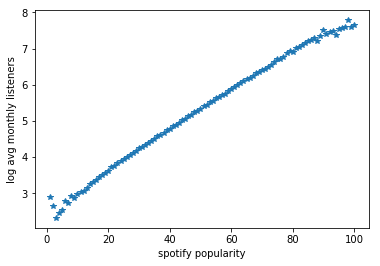

In [226]:
plt.plot(avg_monthy_streams_per_pop.index[1:],np.log10(avg_monthy_streams_per_pop.values[1:]),'*')
plt.xlabel('spotify popularity')
plt.ylabel('log avg monthly listeners')

In [227]:
hist=popularity[popularity.columns[0:1]].join(listeners[listeners.columns[0]],how='right',lsuffix='hi').groupby('2019-01-01 00:00:00hi').sum()

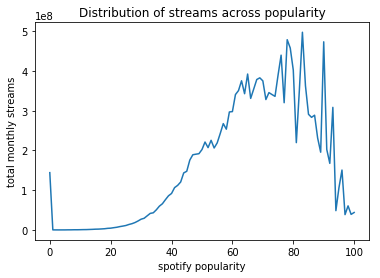

In [228]:
plt.plot(hist.index,hist.values)
plt.title('Distribution of streams across popularity')
plt.xlabel('spotify popularity')
plt.ylabel('total monthly streams')

# this is the average popularity of artist heard on spotify

In [229]:
hist.values.T.dot(hist.index)/hist.values.sum()

array([68.46550088])

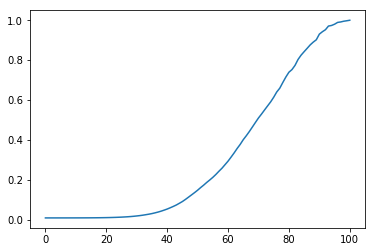

In [230]:
plt.plot(hist.cumsum()/hist.sum())

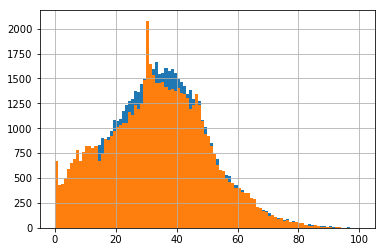

In [231]:
popularity[popularity.columns[0]].hist(bins=100)
popularity[popularity.columns[-1]].hist(bins=100)

In [232]:
log_listeners=np.log(listeners)

In [233]:
log_listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,13.274270,13.379822,13.440586,13.497131,13.463368,13.374186,13.450803,13.110034,13.235301,13.343372,...,12.634173,12.678405,12.678517,12.626150,12.628994,12.626568,12.666203,12.741527,12.613779,12.687671
!Distain,7.608871,7.638198,7.606885,7.569412,7.711549,7.580189,7.494430,7.426549,7.474205,7.451242,...,7.661056,7.693482,7.737180,7.743703,8.554489,7.688913,7.678326,7.662938,7.607381,8.131825
!Mc'Lain!,5.433722,5.424950,5.318120,8.894396,9.729253,9.086137,8.684739,8.890961,8.502891,8.891649,...,7.902487,7.792349,7.935587,8.847072,8.035603,8.007367,7.844241,8.260751,7.876259,8.202756
#1 Dads,11.430858,11.565015,11.497009,11.493783,11.434153,11.314511,11.567111,11.606498,11.781012,11.613277,...,12.597033,12.551713,12.520566,12.492916,12.440658,12.393713,12.476928,12.488865,12.555740,12.575859
#1 Garth Brooks Tribute Band,9.955606,9.982992,10.076810,10.108345,10.131221,10.160027,10.135670,10.161651,10.159911,10.131061,...,10.089718,10.171681,10.206292,10.333548,10.445172,10.444532,10.414213,10.329735,10.285718,10.379256


In [234]:
from math import floor

In [235]:
def round_to_1(x):
    y=[0,1]
    for val in x:
        #print(-int(floor(np.log10(abs(val)))))
        y.append(np.round(val, -int(floor(np.log10(abs(val))))))
    return y

In [236]:
plt.rcParams['figure.figsize'] = [10, 7]

[]

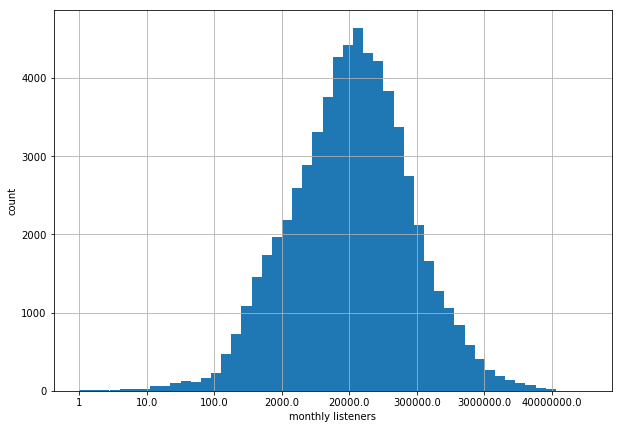

In [237]:
hist=log_listeners[log_listeners.columns[0]].hist(bins=50)
hist.set_xticklabels(round_to_1(np.exp(hist.get_xticks())[2:]))
#log_listeners[log_listeners.columns[-1]].hist(bins=100)
hist.set_xlabel("monthly listeners")
hist.set_ylabel("count")
hist.set_title('')
hist.plot()

In [238]:
np.exp(hist.get_xticks())[:]

array([8.20849986e-02, 1.00000000e+00, 1.21824940e+01, 1.48413159e+02,
       1.80804241e+03, 2.20264658e+04, 2.68337287e+05, 3.26901737e+06,
       3.98247844e+07, 4.85165195e+08])

In [239]:
round_to_1(np.exp(hist.get_xticks()))

[0,
 1,
 0.08,
 1.0,
 10.0,
 100.0,
 2000.0,
 20000.0,
 300000.0,
 3000000.0,
 40000000.0,
 500000000.0]

In [240]:
x_ticks=round_to_1(np.exp(hist.get_xticks()))[7:]

In [241]:
print(x_ticks)

[20000.0, 300000.0, 3000000.0, 40000000.0, 500000000.0]


In [242]:
large_cap.iloc[:,0].min()

5380800

In [243]:
mid_cap.iloc[:,0].min()

955610

In [244]:
small_cap.iloc[:,0].min()

139161

[]

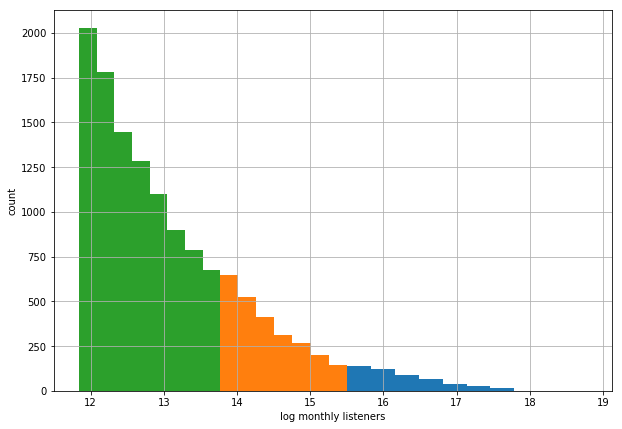

In [245]:
hist_large_cap=log_listeners[log_listeners.columns[0]][large_cap.index].hist(bins=10)
hist_mid_cap=log_listeners[log_listeners.columns[0]][mid_cap.index].hist(bins=7)
hist_small_cap=log_listeners[log_listeners.columns[0]][small_cap.index].hist(bins=8)

#hist_head.set_xticklabels(round_to_1(np.exp(hist.get_xticks())[2:]))

hist_small_cap.set_xlabel("log monthly listeners")
hist_small_cap.set_ylabel("count")
hist_small_cap.set_title('')
#hist_small_cap.set_xticklabels(x_ticks)
hist_small_cap.plot()

[]

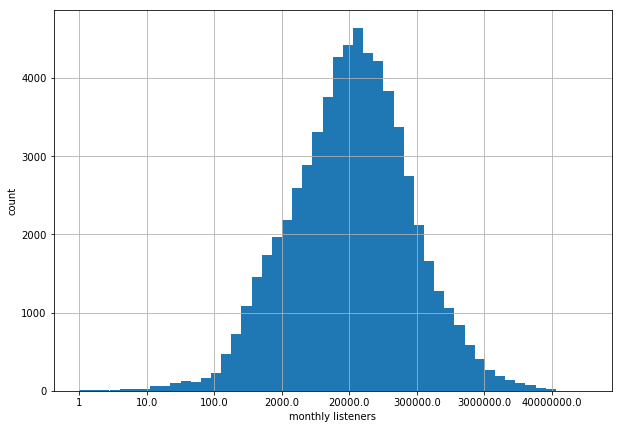

In [246]:
hist=log_listeners[log_listeners.columns[0]].hist(bins=50)
hist.set_xticklabels(round_to_1(np.exp(hist.get_xticks())[2:]))
#log_listeners[log_listeners.columns[-1]].hist(bins=100)
hist.set_xlabel("monthly listeners")
hist.set_ylabel("count")
hist.set_title('')
hist.plot()

# streaming growth curve for each artist

Assumption 1:
All artist streams grow at the same rate g, per month
$$ E[s_i]=s_0 g^i $$

Assumption 2:
The price of an artists streams is the net present value of all cashflows, discounted at rate d
$$ p_0= \sum_{i >0} E[s_i] k \frac{1}{d^i} $$
where $k$ is the revenue per stream (0.38 cents per stream)

Assumption 3:
$d>g$

Imply assumption 4:
$$p_0=k \sum_{i >0} E[s_i]  \frac{1}{d^i} = k\sum_{i >0} s_0  \frac{g^i}{d^i} =  s_0  \frac{k}{1-\frac{g}{d}} = s_0 M $$
where $M$ is a multiplier of the current number of streams

It follows that
$$\frac{p_n}{p_0}=\frac{s_n}{s_0}$$
so the ratio in streams is the ratio in prices

In [247]:
listeners_ratio=listeners.copy()

In [248]:
listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,582026,646819,687341,727327,703180,643184,694400,493873,559781,623667,...,306868,320746,320782,304416,305283,304543,316856,341645,300673,323732
!Distain,2016,2076,2012,1938,2234,1959,1798,1680,1762,1722,...,2124,2194,2292,2307,5190,2184,2161,2128,2013,3401
!Mc'Lain!,229,227,204,7291,16802,8832,5912,7266,4929,7271,...,2704,2422,2795,6954,3089,3003,2551,3869,2634,3651
#1 Dads,92121,105347,98421,98104,92425,82003,105568,109809,130746,110556,...,295680,282579,273913,266443,252877,241280,262217,265366,283719,289485
#1 Garth Brooks Tribute Band,21070,21655,23785,24547,25115,25849,25227,25891,25846,25111,...,24094,26152,27073,30747,34378,34356,33330,30630,29311,32185


In [249]:
for col in listeners_ratio.columns:
    listeners_ratio[col]=listeners[col]/listeners[listeners.columns[0]]
    
listeners_monthly_ratio=listeners_ratio.copy()
for i in range(0,len(listeners.columns)-2):
    listeners_monthly_ratio[listeners.columns[i+1]]=listeners[listeners.columns[i+1]]/listeners[listeners.columns[i]]

In [250]:
condition=(listeners_monthly_ratio>0.5) #& (listeners_monthly_ratio<upper)

In [251]:
listeners_ratio_clean=listeners_ratio[condition].dropna()

In [252]:
listeners.head()

,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
name,,,,,,,,,,,,,,,,,,,,,
!!!,582026,646819,687341,727327,703180,643184,694400,493873,559781,623667,...,306868,320746,320782,304416,305283,304543,316856,341645,300673,323732
!Distain,2016,2076,2012,1938,2234,1959,1798,1680,1762,1722,...,2124,2194,2292,2307,5190,2184,2161,2128,2013,3401
!Mc'Lain!,229,227,204,7291,16802,8832,5912,7266,4929,7271,...,2704,2422,2795,6954,3089,3003,2551,3869,2634,3651
#1 Dads,92121,105347,98421,98104,92425,82003,105568,109809,130746,110556,...,295680,282579,273913,266443,252877,241280,262217,265366,283719,289485
#1 Garth Brooks Tribute Band,21070,21655,23785,24547,25115,25849,25227,25891,25846,25111,...,24094,26152,27073,30747,34378,34356,33330,30630,29311,32185


In [253]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
symbols=['VTHR']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2022, 1, 1)
df = yf.download(symbols, start=start, end=end)
prices=df['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-01-02    108.472176
2019-01-03    106.199074
2019-01-04    109.594475
2019-01-07    110.507523
2019-01-08    111.677376
Name: Adj Close, dtype: float64

In [256]:
stock_market=(prices/prices.iloc[0]).iloc[::30]

In [156]:
drake=listeners.loc['Drake']/listeners.loc['Drake'].iloc[0]
bobdylan=listeners.loc['Taylor Swift']/listeners.loc['Taylor Swift'].iloc[0]
olivia=listeners.loc['Kanye West']/listeners.loc['Kanye West'].iloc[0]
edsheeran=listeners.loc['Ed Sheeran']/listeners.loc['Ed Sheeran'].iloc[0]

In [258]:
plt.rcParams['figure.figsize'] = [20, 10]

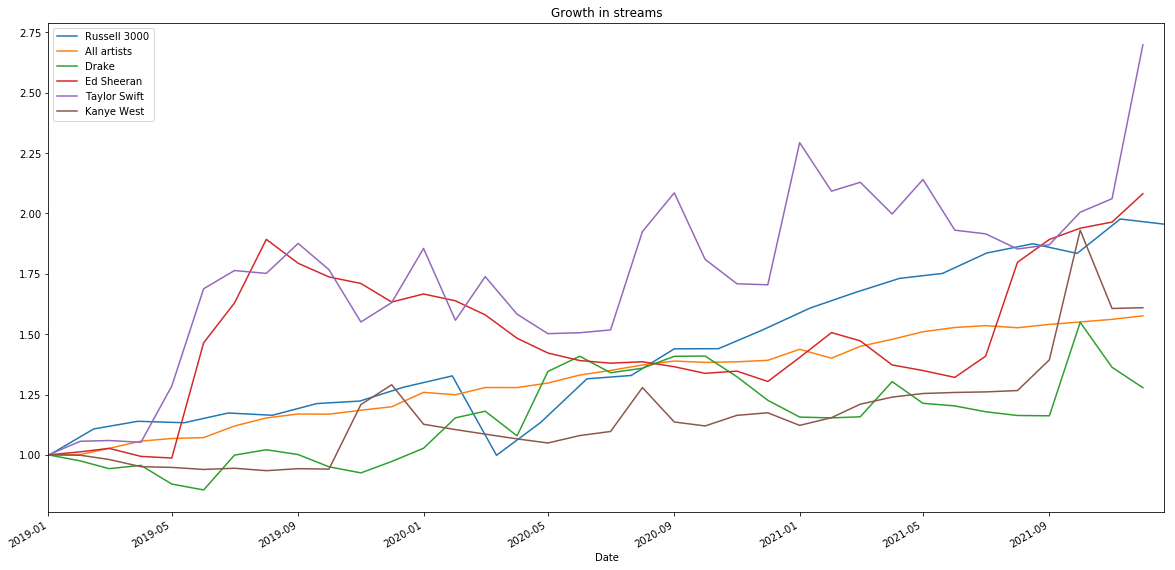

In [259]:
stock_market.plot(label='Russell 3000')
hey=listeners.sum()/listeners.sum().iloc[0]
hey.plot(label='All artists')
drake.plot(label='Drake')
edsheeran.plot(label='Ed Sheeran')
bobdylan.plot(label='Taylor Swift')
olivia.plot(label='Kanye West')
#(prices/prices.iloc[0]).iloc[::30].plot(label='Russell 3000')
plt.title("Growth in streams")
plt.legend()

500
2500
10000


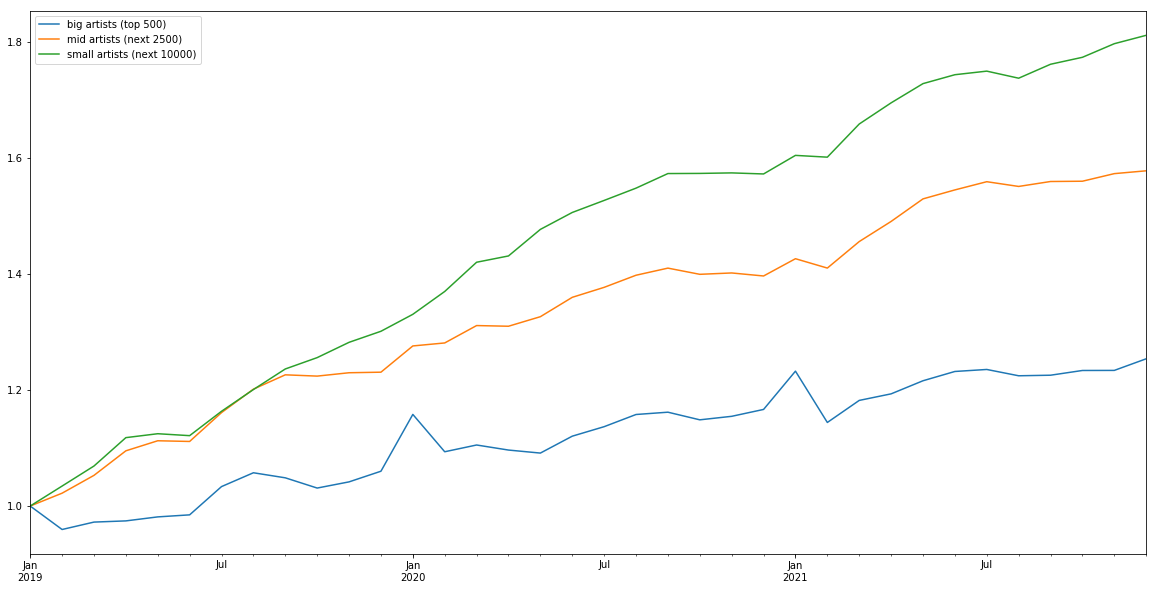

In [260]:
upper=large_cap
print(len(upper))
upper=upper.sum()
upper=upper/upper.iloc[0]
upper.plot(label='big artists (top 500)')
mid=mid_cap
print(len(mid))
mid=mid.sum()
mid=mid/mid.iloc[0]
mid.plot(label='mid artists (next 2500)')
low=small_cap
print(len(low))
low=low.sum()
low=low/low.iloc[0]
low.plot(label='small artists (next 10000)')
plt.legend()